In [1]:
import pandas as pd
from sklearn import preprocessing
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
customer_data = pd.read_csv("Retail Data v4 - unclean.csv")

In [3]:
customer_data[0:20]

,Age,Gender,Married,Salary,Annual Spend
0,28.2,Male,Single,26908.95,331.56
1,43.5,Female,Married,39366.44,3071.18
2,27.7,Female,Single,NaN,1357.19
3,18.9,Male,Single,26235.55,769.78
4,18.0,Male,Single,30822.14,100.00
5,22.9,Female,Single,18334.52,2854.59
6,43.5,Female,Married,36642.04,1926.37
7,28.0,Male,Single,34612.04,853.10
8,52.3,Female,Married,34779.79,NaN
9,27.2,Female,Single,21901.08,566.21


In [4]:
customer_data.isnull().sum()

Age             10
Gender           0
Married          0
Salary           9
Annual Spend    10
dtype: int64

In [5]:
customer_data.isnull().sum().sum()

29

<AxesSubplot:>

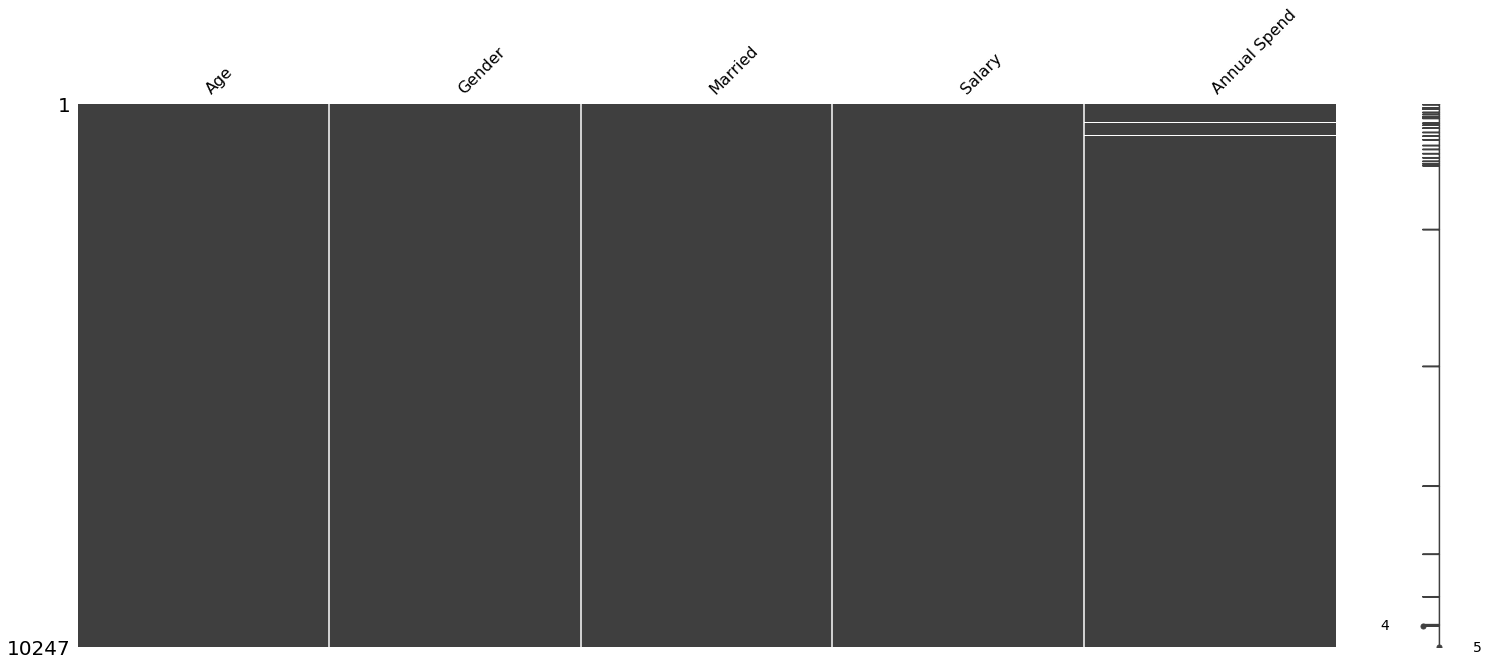

In [6]:
import missingno as msno
msno.matrix(customer_data)

<AxesSubplot:>

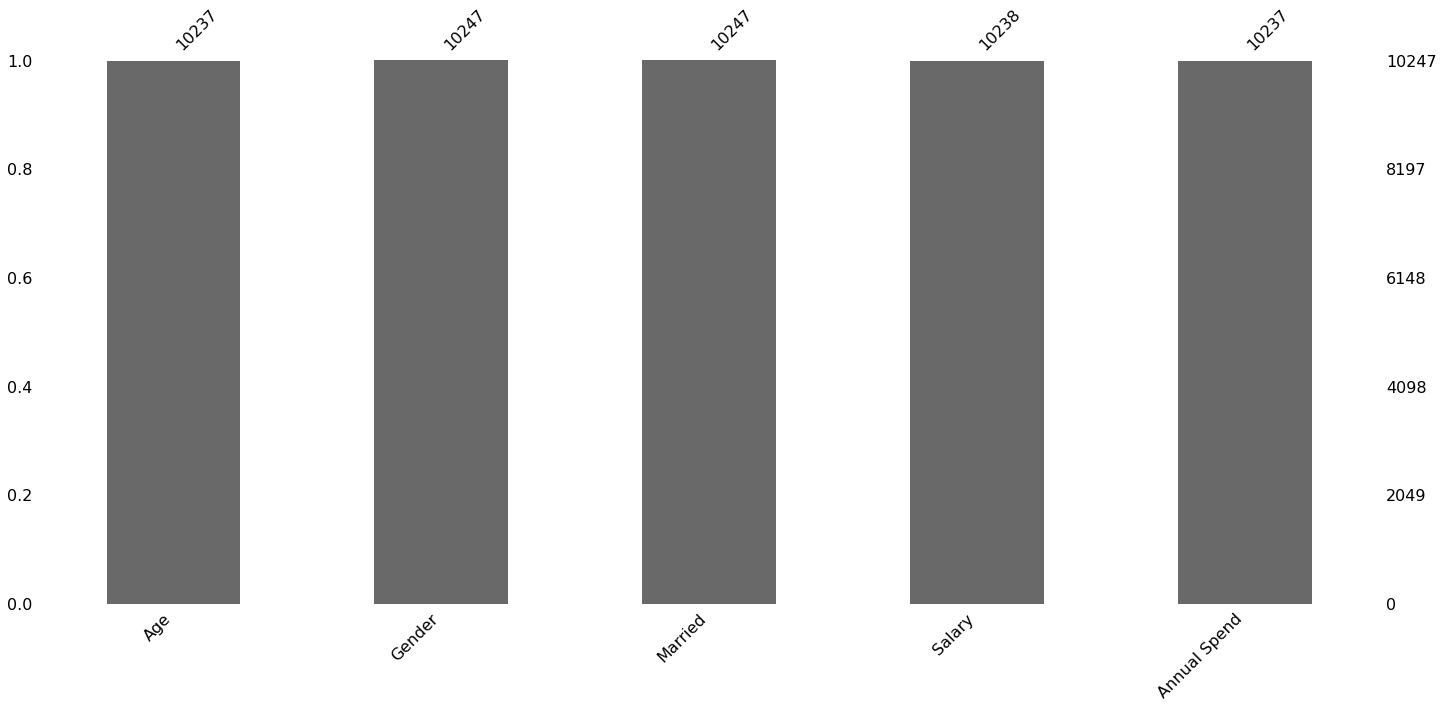

In [7]:
msno.bar(customer_data)

In [8]:
customer_data['Annual Spend'].fillna(customer_data['Annual Spend'].mean(),inplace=True)
customer_data

,Age,Gender,Married,Salary,Annual Spend
0,28.2,Male,Single,26908.95,331.56
1,43.5,Female,Married,39366.44,3071.18
2,27.7,Female,Single,NaN,1357.19
3,18.9,Male,Single,26235.55,769.78
4,18.0,Male,Single,30822.14,100.00
...,...,...,...,...,...
10242,23.8,Female,Single,24218.53,1779.65
10243,26.6,Female,Single,26793.32,2352.41
10244,22.1,Male,Single,29096.49,410.25
10245,23.0,Female,Single,23437.99,1945.92


In [9]:
customer_data['Age'].fillna(customer_data['Age'].mean(),inplace=True)
customer_data

,Age,Gender,Married,Salary,Annual Spend
0,28.2,Male,Single,26908.95,331.56
1,43.5,Female,Married,39366.44,3071.18
2,27.7,Female,Single,NaN,1357.19
3,18.9,Male,Single,26235.55,769.78
4,18.0,Male,Single,30822.14,100.00
...,...,...,...,...,...
10242,23.8,Female,Single,24218.53,1779.65
10243,26.6,Female,Single,26793.32,2352.41
10244,22.1,Male,Single,29096.49,410.25
10245,23.0,Female,Single,23437.99,1945.92


In [10]:
customer_data['Salary'].fillna(customer_data['Salary'].mean(),inplace=True)
customer_data

,Age,Gender,Married,Salary,Annual Spend
0,28.2,Male,Single,26908.950000,331.56
1,43.5,Female,Married,39366.440000,3071.18
2,27.7,Female,Single,36629.132727,1357.19
3,18.9,Male,Single,26235.550000,769.78
4,18.0,Male,Single,30822.140000,100.00
...,...,...,...,...,...
10242,23.8,Female,Single,24218.530000,1779.65
10243,26.6,Female,Single,26793.320000,2352.41
10244,22.1,Male,Single,29096.490000,410.25
10245,23.0,Female,Single,23437.990000,1945.92


<AxesSubplot:>

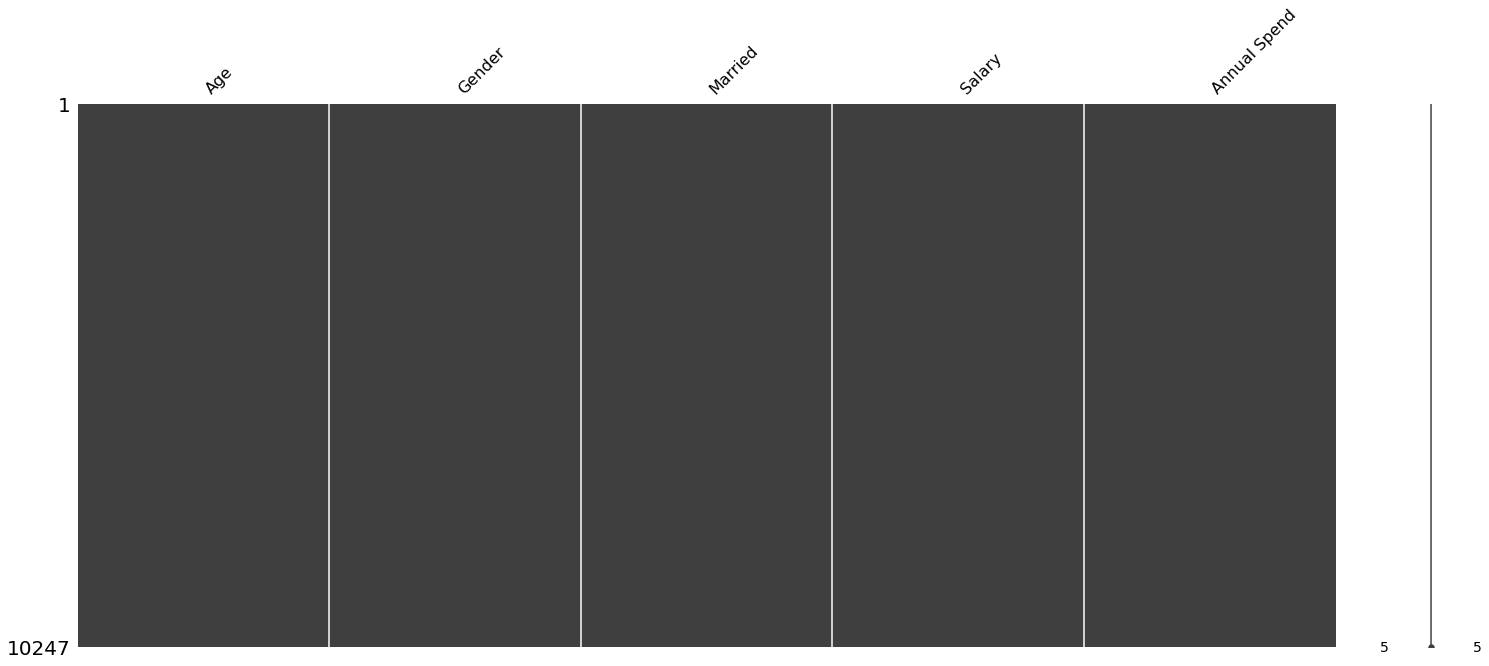

In [11]:
msno.matrix(customer_data)

<AxesSubplot:>

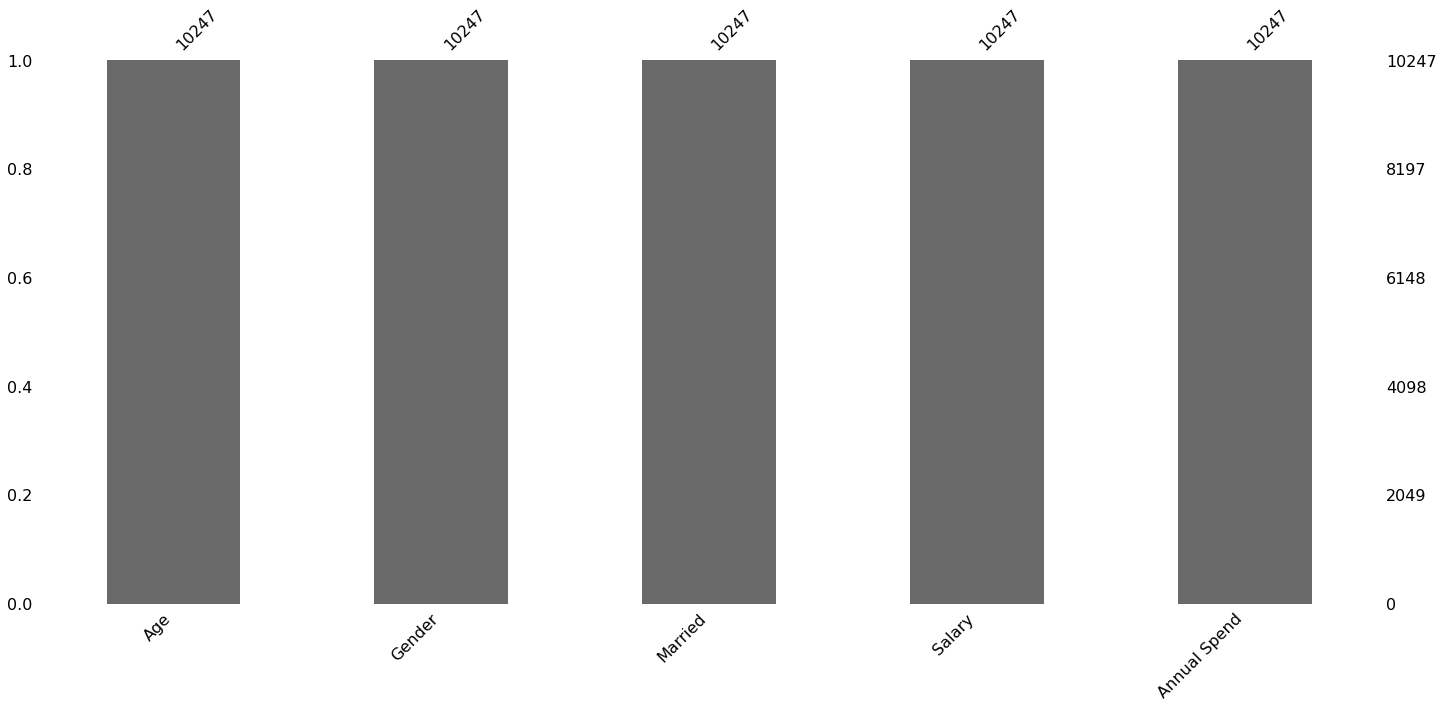

In [12]:
msno.bar(customer_data)

In [13]:
customer_data.isnull().sum()

Age             0
Gender          0
Married         0
Salary          0
Annual Spend    0
dtype: int64

In [14]:
customer_data.isnull().sum().sum()

0

In [15]:
column_name = 'Gender'
one_hot = pd.get_dummies(customer_data[column_name],prefix='gender')
customer_data.drop(column_name, axis=1, inplace=True)
customer_data = one_hot.join(customer_data)

In [16]:
customer_data[0:20]

,gender_Female,gender_Male,Age,Married,Salary,Annual Spend
0,0,1,28.200000,Single,26908.950000,331.560000
1,1,0,43.500000,Married,39366.440000,3071.180000
2,1,0,27.700000,Single,36629.132727,1357.190000
3,0,1,18.900000,Single,26235.550000,769.780000
4,0,1,18.000000,Single,30822.140000,100.000000
5,1,0,22.900000,Single,18334.520000,2854.590000
6,1,0,43.500000,Married,36642.040000,1926.370000
7,0,1,28.000000,Single,34612.040000,853.100000
8,1,0,52.300000,Married,34779.790000,2159.080891
9,1,0,27.200000,Single,21901.080000,566.210000


In [17]:
column_name = 'Married'
one_hot = pd.get_dummies(customer_data[column_name],prefix='married')
customer_data.drop(column_name, axis=1, inplace=True)
customer_data = one_hot.join(customer_data)

In [18]:
customer_data[0:5]

,married_Married,married_Single,gender_Female,gender_Male,Age,Salary,Annual Spend
0,0,1,0,1,28.2,26908.950000,331.56
1,1,0,1,0,43.5,39366.440000,3071.18
2,0,1,1,0,27.7,36629.132727,1357.19
3,0,1,0,1,18.9,26235.550000,769.78
4,0,1,0,1,18.0,30822.140000,100.00


In [19]:
num_col = customer_data.iloc[:, 4:7:1]

In [20]:
import seaborn as sns
from pandas.plotting import scatter_matrix

array([[<AxesSubplot:xlabel='Age', ylabel='Age'>,
        <AxesSubplot:xlabel='Salary', ylabel='Age'>,
        <AxesSubplot:xlabel='Annual Spend', ylabel='Age'>],
       [<AxesSubplot:xlabel='Age', ylabel='Salary'>,
        <AxesSubplot:xlabel='Salary', ylabel='Salary'>,
        <AxesSubplot:xlabel='Annual Spend', ylabel='Salary'>],
       [<AxesSubplot:xlabel='Age', ylabel='Annual Spend'>,
        <AxesSubplot:xlabel='Salary', ylabel='Annual Spend'>,
        <AxesSubplot:xlabel='Annual Spend', ylabel='Annual Spend'>]],
      dtype=object)

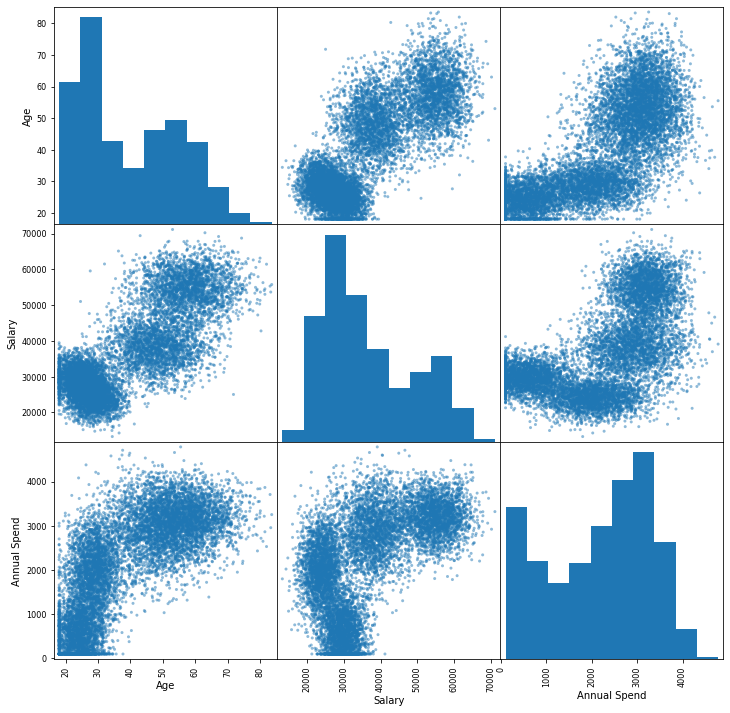

In [21]:
scatter_matrix(num_col, figsize=(12,12))

In [22]:
standardized_customer_data = preprocessing.scale(customer_data)
standardized_customer_data_df = pd.DataFrame(standardized_customer_data, columns = customer_data.columns)

In [23]:
standardized_customer_data_df

,married_Married,married_Single,gender_Female,gender_Male,Age,Salary,Annual Spend
0,-0.986911,0.986911,-1.001465,1.001465,-0.753194,-0.789381,-1.596013
1,1.013263,-1.013263,0.998537,-0.998537,0.257177,0.222298,0.796556
2,-0.986911,0.986911,0.998537,-0.998537,-0.786213,0.000000,-0.700309
3,-0.986911,0.986911,-1.001465,1.001465,-1.367342,-0.844068,-1.213306
4,-0.986911,0.986911,-1.001465,1.001465,-1.426776,-0.471589,-1.798240
...,...,...,...,...,...,...,...
10242,-0.986911,0.986911,0.998537,-0.998537,-1.043759,-1.007871,-0.331365
10243,-0.986911,0.986911,0.998537,-0.998537,-0.858854,-0.798771,0.168838
10244,-0.986911,0.986911,-1.001465,1.001465,-1.156022,-0.611730,-1.527292
10245,-0.986911,0.986911,0.998537,-0.998537,-1.096589,-1.071259,-0.186158


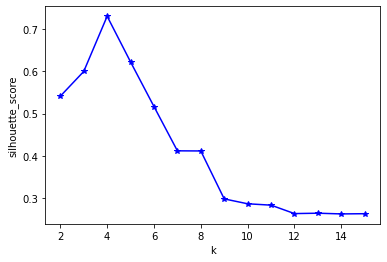

In [24]:
from sklearn import metrics
def k_silhouette(X, clusters):
    K = range(2, clusters+1)
    S = []
    for k in K:
        kmeans = KMeans(n_clusters = k)
        kmeans.fit(X)
        labels = kmeans.labels_
        S.append(metrics.silhouette_score(X,labels, metric="euclidean"))
    plt.plot(K, S, 'b*-')
    plt.xlabel('k')
    plt.ylabel('silhouette_score')
    
    plt.show();
k_silhouette(standardized_customer_data_df, 15)

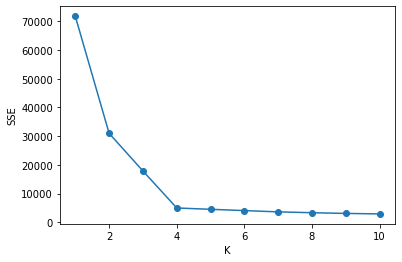

In [25]:
import matplotlib.pyplot as plt
sse = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k,)
    kmeans.fit(standardized_customer_data_df)
    sse.append(kmeans.inertia_)
x = range(1,11)
plt.xlabel('K')
plt.ylabel('SSE')
plt.plot(x,sse,'o-')
plt.show()

In [26]:
kmeans = KMeans(n_clusters=4)

In [27]:
kmeans.fit(standardized_customer_data_df)

KMeans(n_clusters=4)

In [28]:
y_km = kmeans.fit_predict(standardized_customer_data_df)

In [29]:
print(y_km[0:20])

[0 1 2 0 0 2 1 0 1 2 1 2 2 1 2 2 1 2 3 2]


In [30]:
print(customer_data[y_km==2][0:10])

    married_Married  married_Single  gender_Female  gender_Male   Age  \
2                 0               1              1            0  27.7   
5                 0               1              1            0  22.9   
9                 0               1              1            0  27.2   
11                0               1              1            0  31.0   
12                0               1              1            0  34.9   
14                0               1              1            0  32.8   
15                0               1              1            0  28.7   
17                0               1              1            0  28.0   
19                0               1              1            0  30.4   
20                0               1              1            0  29.9   

          Salary  Annual Spend  
2   36629.132727       1357.19  
5   18334.520000       2854.59  
9   21901.080000        566.21  
11  24944.100000       1661.97  
12  23136.510000       1343.36 

In [31]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [32]:
%matplotlib
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(20,20)
ax.set_xlabel('Annual Spend')
ax.set_ylabel('Salary')
ax.set_zlabel('Age')
ax.scatter(customer_data[y_km==0]['Annual Spend'],customer_data[y_km==0]['Salary'],customer_data[y_km==0]['Age'],s=15,c='red',alpha=.3)
ax.scatter(customer_data[y_km==1]['Annual Spend'],customer_data[y_km==1]['Salary'],customer_data[y_km==1]['Age'],s=15,c='red',alpha=.3)
ax.scatter(customer_data[y_km==2]['Annual Spend'],customer_data[y_km==2]['Salary'],customer_data[y_km==2]['Age'],s=15,c='red',alpha=.3)
ax.scatter(customer_data[y_km==3]['Annual Spend'],customer_data[y_km==3]['Salary'],customer_data[y_km==3]['Age'],s=15,c='red',alpha=.3)


Using matplotlib backend: <object object at 0x7fba85f5a720>
